In [70]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [71]:
# testing for finding eye 

In [72]:
img = cv2.imread('testimg/test.jpg')
img.shape

(300, 450, 3)

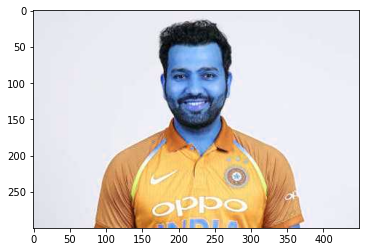

In [73]:
plt.imshow(img)

In [74]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(300, 450)

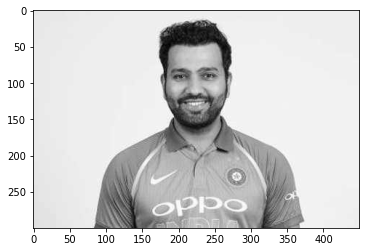

In [75]:
plt.imshow(gray, cmap='gray')

In [76]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')


In [77]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[169,  47, 107, 107]])

In [78]:
(x,y,w,h) = faces[0]
x,y,w,h

(169, 47, 107, 107)

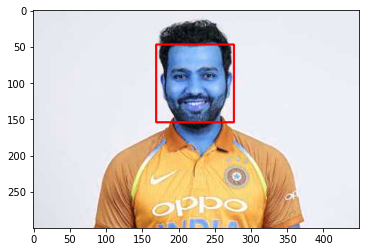

In [79]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

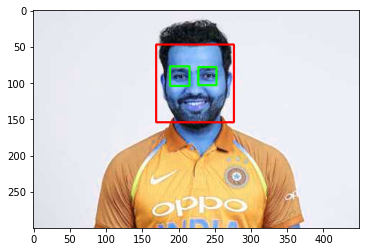

In [80]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

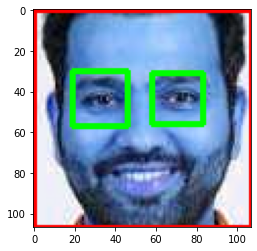

In [81]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [90]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
        cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

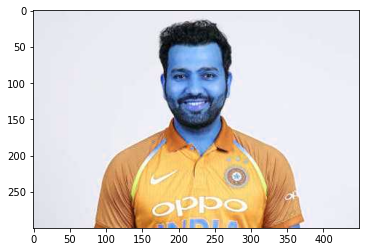

In [83]:
original_image = cv2.imread('testimg/test.jpg')
plt.imshow(original_image)

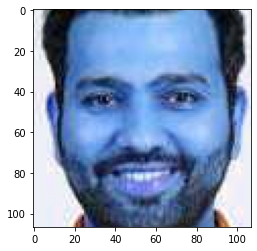

In [84]:
cropped_image = get_cropped_image_if_2_eyes('testimg/test.jpg')
plt.imshow(cropped_image)

In [85]:
path_to_data = "dataset/"
path_to_cr_data = "dataset/cropped/"

In [86]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [87]:
img_dirs

['dataset/cropped',
 'dataset/Gautam_Gambhir',
 'dataset/Hardik_Pandya',
 'dataset/M_S_Dhoni',
 'dataset/Rohit_Sharma',
 'dataset/Sachin_Tendulkar',
 'dataset/Virat_Kohli',
 'dataset/Yuvraj_Singh']

In [88]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [91]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cropped
Gautam_Gambhir
Hardik_Pandya
Generating cropped images in folder:  dataset/cropped/Hardik_Pandya
M_S_Dhoni
Generating cropped images in folder:  dataset/cropped/M_S_Dhoni
Rohit_Sharma
Generating cropped images in folder:  dataset/cropped/Rohit_Sharma
Sachin_Tendulkar
Generating cropped images in folder:  dataset/cropped/Sachin_Tendulkar
Virat_Kohli
Generating cropped images in folder:  dataset/cropped/Virat_Kohli
Yuvraj_Singh
Generating cropped images in folder:  dataset/cropped/Yuvraj_Singh


# Data Cleaning is Done